### Importing Libraries

In [1]:
#pip install chart_studio

In [2]:
#pip install cufflinks

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from chart_studio.plotly import plot,iplot
import cufflinks as cf
import seaborn as sns

%matplotlib inline

# For Training Data

In [4]:
data=pd.read_excel('Data_Train.xlsx')

In [5]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Automated EDA

In [6]:
#pip install pandas-profiling

In [7]:
import pandas_profiling as pf

In [8]:
pf.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Manual EDA

In [9]:
data.shape

(10683, 11)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [11]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
data.dropna(inplace=True)

In [13]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### Feature Engineering

- Date_of_Journey

In [14]:
#converting dtype of '''Date_of_journey''' from object to date time
data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey'])
data['Day_of_Journey']=(data['Date_of_Journey']).dt.day
data['Month_of_journey']=(data['Date_of_Journey']).dt.month

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '18/04/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '24/04/2019' in DD/MM/YYYY format. Provide format or 

In [15]:
#droping Date_of_Journey
data.drop(['Date_of_Journey'],axis=1,inplace=True)

- Dep_Time

In [16]:
#Dep_time
data['Dep_hr']=pd.to_datetime(data['Dep_Time']).dt.hour
data['Dep_min']=pd.to_datetime(data['Dep_Time']).dt.minute

In [17]:
#droping Dep_time
data.drop(['Dep_Time'],axis=1,inplace=True)

- Arival_Time

In [18]:
data['Arrival_hr']=pd.to_datetime(data['Arrival_Time']).dt.hour
data['Arrival_min']=pd.to_datetime(data['Arrival_Time']).dt.minute

In [19]:
#dropping Arrival_Time
data.drop(['Arrival_Time'],axis=1,inplace=True)

- Duration

In [20]:
duration=data['Duration'].str.split(' ',expand=True)

In [21]:
duration[1].fillna('00m',inplace=True)

In [22]:
print(duration[0][0].replace('h',''))
x=duration[0][0]
print(x[:-1])
print(x[1:])

2
2
h


In [23]:
data['duration_hr']=duration[0].apply(lambda x:x[:-1])
data['duration_min']=duration[1].apply(lambda x:x[:-1])

In [24]:
data['duration_hr']=data['duration_hr'].astype('int')

In [25]:
data['duration_min']=data['duration_min'].astype('int')

In [26]:
data.drop(['Duration'],axis=1,inplace=True)

- count of airlines

In [27]:
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

### visualizaion

- airlines vs price

In [28]:
airprices=data.groupby('Airline')['Price'].mean().sort_values(ascending=False)

In [29]:
airprices

Airline
Jet Airways Business                 58358.666667
Jet Airways                          11643.923357
Multiple carriers Premium economy    11418.846154
Multiple carriers                    10902.678094
Air India                             9612.427756
Vistara Premium economy               8962.333333
Vistara                               7796.348643
GoAir                                 5861.056701
IndiGo                                5673.682903
Air Asia                              5590.260188
SpiceJet                              4338.284841
Trujet                                4140.000000
Name: Price, dtype: float64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



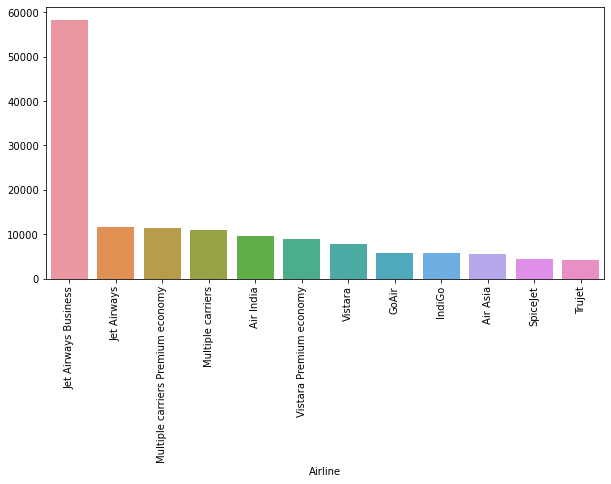

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(airprices.index,airprices.values)
plt.xticks(rotation=90)
plt.show()

In [31]:
#jet airways business charge more money

- Price based on number of stops

In [32]:
data.groupby(['Airline','Total_Stops'])['Price'].mean()

Airline                            Total_Stops
Air Asia                           1 stop          7078.325581
                                   2 stops         6341.888889
                                   non-stop        4492.331492
Air India                          1 stop          9041.509259
                                   2 stops        12092.779101
                                   3 stops        12208.054054
                                   4 stops        17686.000000
                                   non-stop        5605.326139
GoAir                              1 stop          6884.676471
                                   non-stop        4726.173913
IndiGo                             1 stop          7104.717528
                                   2 stops         7507.526316
                                   non-stop        4731.174053
Jet Airways                        1 stop         12512.741223
                                   2 stops        13387.247467
        

In [33]:
# plt.figure(figsize=(18,10))
# ax=sns.barplot(x=data['Airline'],y=data['Price'],hue=data['Total_Stops'],palette='Set1')
# ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
# plt.show()

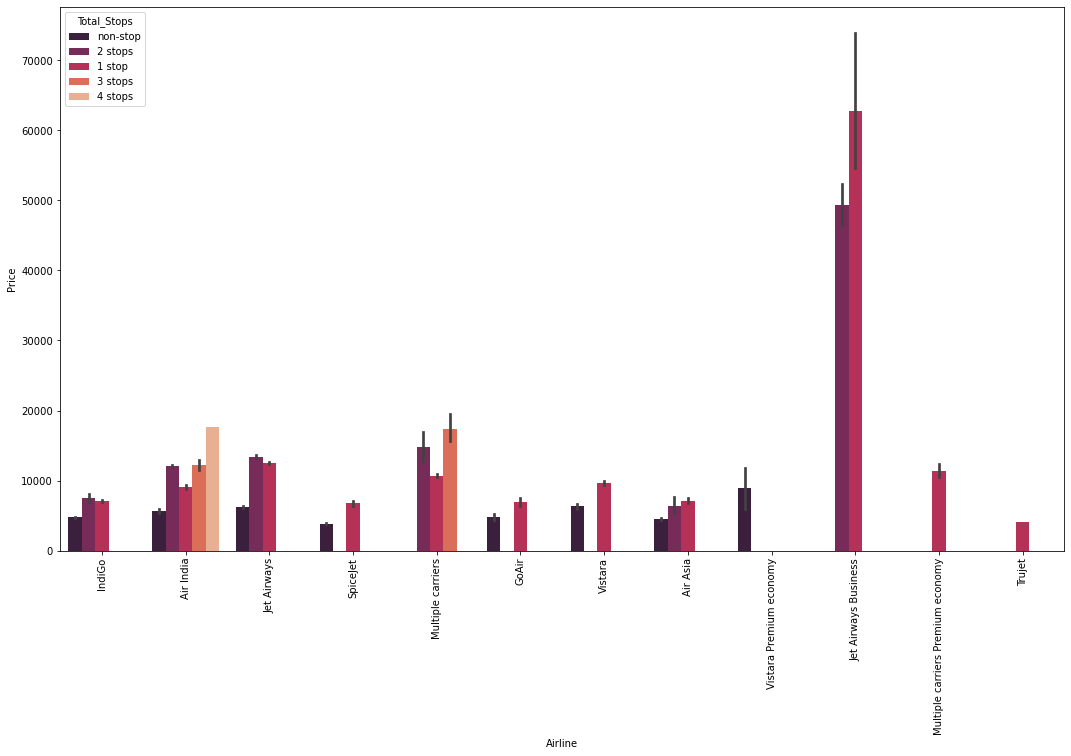

In [34]:
plt.figure(figsize=(18,10))
sns.barplot(x=data['Airline'],y=data['Price'],hue=data['Total_Stops'],palette='rocket')
plt.xticks(rotation=90)
plt.show()

In [35]:
#one or two stop for ,ultiple carriers premium economy having more price

In [36]:
data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

- source vs price

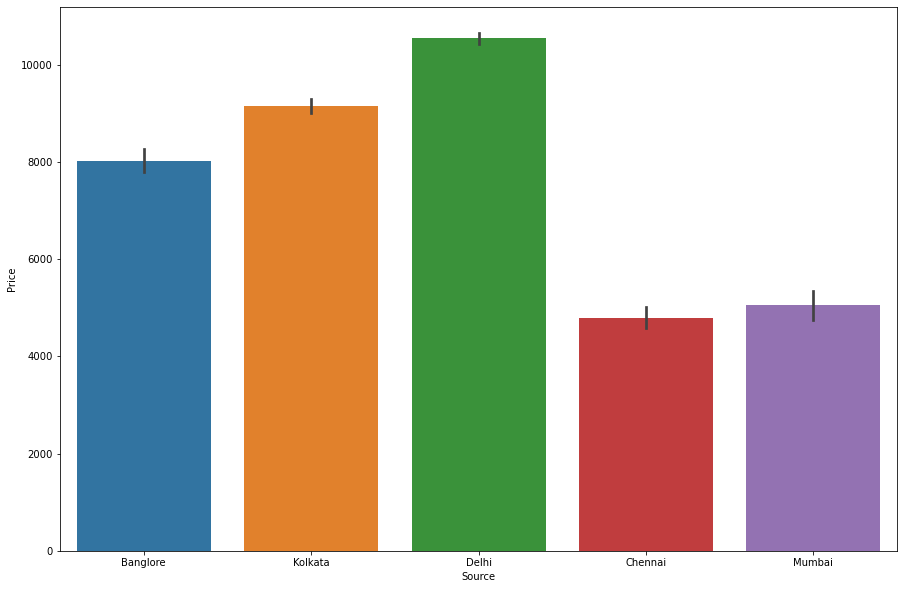

In [37]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Source',data=data)
plt.show()

In [38]:
#delhi is the one with the higest price

- destination vs price

In [39]:
#method 1
data['Destination']=data['Destination'].replace('New Delhi','Delhi')

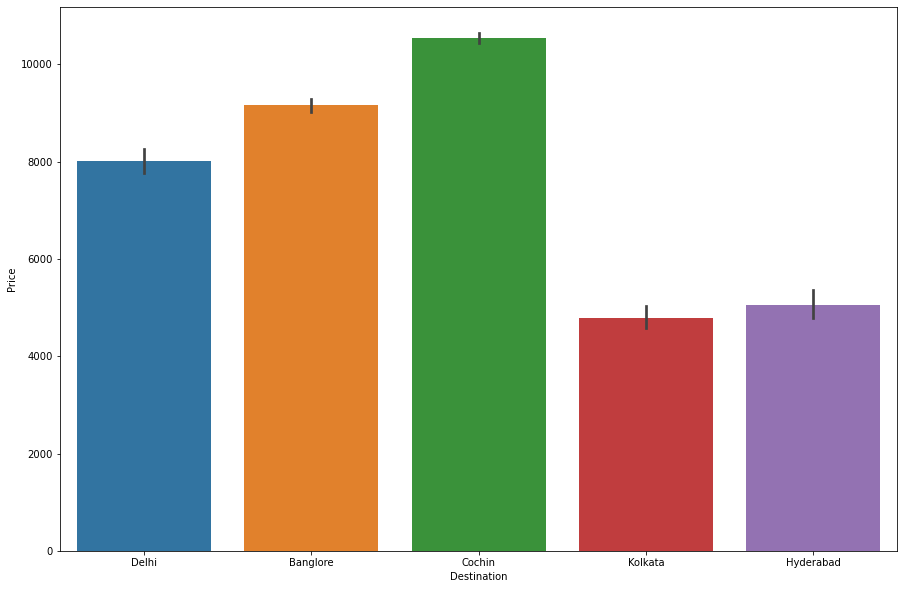

In [40]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=data)
plt.show()

In [41]:
# method 2
#for i in data:
#    data.replace('New Delhi','Delhi',inplace=True)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  object
 1   Source            10682 non-null  object
 2   Destination       10682 non-null  object
 3   Route             10682 non-null  object
 4   Total_Stops       10682 non-null  object
 5   Additional_Info   10682 non-null  object
 6   Price             10682 non-null  int64 
 7   Day_of_Journey    10682 non-null  int64 
 8   Month_of_journey  10682 non-null  int64 
 9   Dep_hr            10682 non-null  int64 
 10  Dep_min           10682 non-null  int64 
 11  Arrival_hr        10682 non-null  int64 
 12  Arrival_min       10682 non-null  int64 
 13  Duration_hr       10682 non-null  int32 
 14  Duration_min      10682 non-null  int32 
dtypes: int32(2), int64(7), object(6)
memory usage: 1.5+ MB


### applying onehot encoding on categorical variables

In [43]:
#handling categorical values
data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [44]:
air_dummy=pd.get_dummies(data['Airline'],drop_first=True)
source_dest_dummy=pd.get_dummies(data[['Source','Destination']],drop_first=True)

In [45]:
data['Total_Stops']=data['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [46]:
data3=data.copy()

In [47]:
data=pd.concat([air_dummy,source_dest_dummy,data],axis=1)

In [48]:
data.drop(['Airline','Destination'],axis=1,inplace=True)

In [49]:
data.drop(['Source'],axis=1,inplace=True)

In [50]:
pd.set_option('display.max_columns', None)
data.head(1)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hr,Duration_min
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50


In [51]:
data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [52]:
data['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

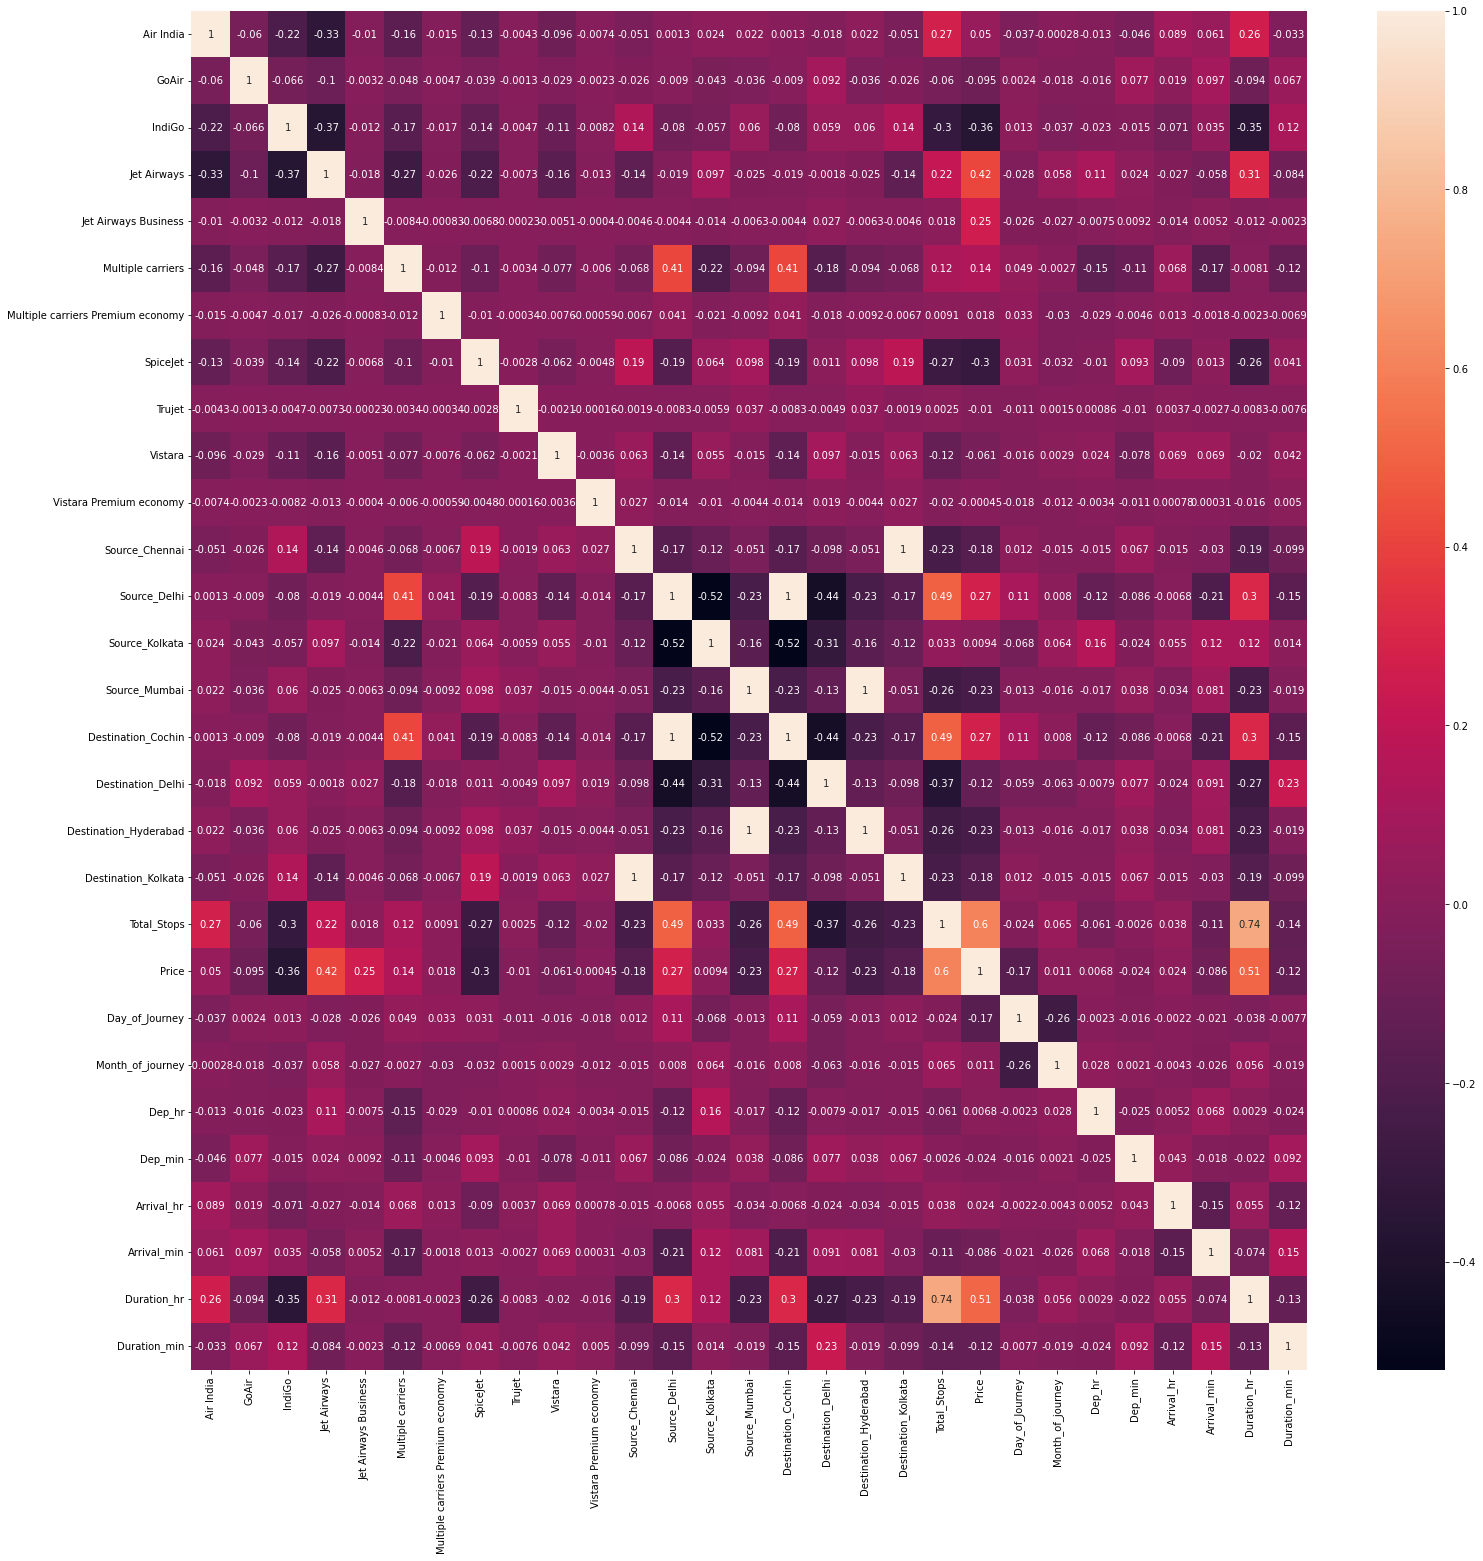

In [53]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [54]:
data.drop(['Additional_Info'],axis=1,inplace=True)

In [55]:
data['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [56]:
data.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Route', 'Total_Stops', 'Price', 'Day_of_Journey', 'Month_of_journey',
       'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min', 'Duration_hr',
       'Duration_min'],
      dtype='object')

# Test Data

In [58]:
data_test=pd.read_excel('Test_set.xlsx')

In [59]:
data_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [60]:
data_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [61]:
air_dummy1=pd.get_dummies(data_test['Airline'],drop_first=True)

In [62]:
dest_source_dummy=pd.get_dummies(data_test[['Source','Destination']],drop_first=True)

In [63]:
data_test['Total_Stops']=data_test['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [64]:
data_test=pd.concat([air_dummy1,dest_source_dummy,data_test],axis=1)

In [65]:
data_test.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [66]:
data_test.drop(['Additional_Info'],axis=1,inplace=True)

In [67]:
data_test.head(1)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6/06/2019,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1


In [68]:
#converting dtype of '''Date_of_journey''' from object to date time
data_test['Date_of_Journey']=pd.to_datetime(data_test['Date_of_Journey'])
data_test['Day_of_Journey']=(data_test['Date_of_Journey']).dt.day
data_test['Month_of_journey']=(data_test['Date_of_Journey']).dt.month

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '21/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '15/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '18/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '21/03/2019' in DD/MM/YYYY format. Provide format or 

In [69]:
#droping Date_of_Journey
data_test.drop(['Date_of_Journey'],axis=1,inplace=True)

In [70]:
#Dep_time
data_test['Dep_hr']=pd.to_datetime(data_test['Dep_Time']).dt.hour
data_test['Dep_min']=pd.to_datetime(data_test['Dep_Time']).dt.minute

In [71]:
#droping Dep_time
data_test.drop(['Dep_Time'],axis=1,inplace=True)

In [72]:
data_test['Arrival_hr']=pd.to_datetime(data_test['Arrival_Time']).dt.hour
data_test['Arrival_min']=pd.to_datetime(data_test['Arrival_Time']).dt.minute

In [73]:
#dropping Arrival_Time
data_test.drop(['Arrival_Time'],axis=1,inplace=True)

In [74]:
duration=data_test['Duration'].str.split(' ',expand=True)

In [75]:
duration[1].fillna('00m',inplace=True)

In [76]:
data_test['duration_hr']=duration[0].apply(lambda x:x[:-1])
data_test['duration_min']=duration[1].apply(lambda x:x[:-1])

In [77]:
data_test['duration_hr']=data_test['duration_hr'].astype('int')
data_test['durration_min']=data_test['duration_min'].astype('int')
data_test.drop(['Duration'],axis=1,inplace=True)

In [78]:
data.drop(['Route'],axis=1,inplace=True)
data_test.drop(['Route'],axis=1,inplace=True)

In [79]:
print(data.shape)
print(data_test.shape)

(10682, 29)
(2671, 28)


### spliting data

In [81]:
x=data.drop(['Price'],axis=1)
y=data['Price']

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=10)

### model building 

In [83]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor(n_estimators=120)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

[10181.22916667 12369.26666667 11283.3125     ...  9226.78333333
 10262.         11239.675     ]
0.753510896107906


In [84]:
ypred=model.predict(x_train)
print(r2_score(y_train,ypred))

0.9746553748390735


In [85]:
#model is overfitting because it do fine with training data and not good with testing data
#if model will do bad in both train and test case then it will be underfitting.

In [86]:
from sklearn.ensemble import RandomForestRegressor
model1=RandomForestRegressor()
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
print(r2_score(y_test,y_pred1))

0.7912510026172543


In [87]:
ypred1=model1.predict(x_train)
print(r2_score(y_train,ypred1))

0.9584058870948904


In [88]:
#still overfitting

### hyperparameter tunning

In [89]:
from sklearn.model_selection import RandomizedSearchCV

#parameters (search on net)
n_estimators=[int(x) for x in np.linspace(start=10,stop=1500,num=10)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(6,45,num=5)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

# create a grid search
rand_grid={'n_estimators':n_estimators,
          'max_features':max_features,
          'max_depth':max_depth,
          'min_samples_split':min_samples_split,
          'min_samples_leaf':min_samples_leaf}
rf=RandomForestRegressor()
rCV=RandomizedSearchCV(estimator=rf,param_distributions=rand_grid,scoring='neg_mean_squared_error',n_iter=10,cv=3,random_state=42,n_jobs=1)

In [90]:
rCV.fit(x_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraT

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [10, 175, 341, 506, 672,
                                                         837, 1003, 1168, 1334,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [91]:
rcv_pred=rCV.predict(x_test)

In [92]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE',mean_absolute_error(y_test,rcv_pred))
print('MAE',mean_squared_error(y_test,rcv_pred))

MAE 1169.341664305586
MAE 4059378.428938179


In [93]:
r2_score(y_test,rcv_pred)

0.8104038982870699

In [94]:
rcv_pred1=rCV.predict(x_train)

In [95]:
r2_score(y_train,rcv_pred1)

0.9106720750587802

In [96]:
#still overfitting

In [97]:
#pip install catboost

In [98]:
from catboost import CatBoostRegressor
cat=CatBoostRegressor()
cat.fit(x_train,y_train)

Learning rate set to 0.056264
0:	learn: 4443.1713698	total: 143ms	remaining: 2m 23s
1:	learn: 4301.1794316	total: 145ms	remaining: 1m 12s
2:	learn: 4153.8416067	total: 147ms	remaining: 49s
3:	learn: 4018.5123920	total: 150ms	remaining: 37.2s
4:	learn: 3898.1404691	total: 152ms	remaining: 30.2s
5:	learn: 3777.2707322	total: 154ms	remaining: 25.5s
6:	learn: 3665.6199246	total: 156ms	remaining: 22.1s
7:	learn: 3573.5354680	total: 158ms	remaining: 19.6s
8:	learn: 3488.0203963	total: 160ms	remaining: 17.6s
9:	learn: 3397.2393632	total: 162ms	remaining: 16s
10:	learn: 3317.6593233	total: 164ms	remaining: 14.7s
11:	learn: 3242.9423918	total: 166ms	remaining: 13.6s
12:	learn: 3169.1828224	total: 168ms	remaining: 12.7s
13:	learn: 3106.5221267	total: 169ms	remaining: 11.9s
14:	learn: 3052.1545967	total: 171ms	remaining: 11.2s
15:	learn: 2997.8932898	total: 173ms	remaining: 10.7s
16:	learn: 2948.9225727	total: 176ms	remaining: 10.2s
17:	learn: 2904.0802005	total: 177ms	remaining: 9.68s
18:	learn:

201:	learn: 1866.2002345	total: 518ms	remaining: 2.04s
202:	learn: 1864.5539595	total: 520ms	remaining: 2.04s
203:	learn: 1863.3587173	total: 522ms	remaining: 2.04s
204:	learn: 1861.6501754	total: 523ms	remaining: 2.03s
205:	learn: 1859.6509301	total: 525ms	remaining: 2.02s
206:	learn: 1858.3443065	total: 527ms	remaining: 2.02s
207:	learn: 1857.0734770	total: 529ms	remaining: 2.01s
208:	learn: 1855.6717745	total: 531ms	remaining: 2.01s
209:	learn: 1854.8629118	total: 532ms	remaining: 2s
210:	learn: 1854.1553346	total: 534ms	remaining: 2s
211:	learn: 1852.5842237	total: 536ms	remaining: 1.99s
212:	learn: 1851.3862271	total: 538ms	remaining: 1.99s
213:	learn: 1850.0196155	total: 540ms	remaining: 1.98s
214:	learn: 1849.3643349	total: 541ms	remaining: 1.98s
215:	learn: 1847.2283080	total: 543ms	remaining: 1.97s
216:	learn: 1846.6706027	total: 545ms	remaining: 1.97s
217:	learn: 1844.9011150	total: 547ms	remaining: 1.96s
218:	learn: 1843.2644477	total: 549ms	remaining: 1.96s
219:	learn: 1842

388:	learn: 1660.0333355	total: 863ms	remaining: 1.36s
389:	learn: 1659.2401151	total: 865ms	remaining: 1.35s
390:	learn: 1658.2665903	total: 867ms	remaining: 1.35s
391:	learn: 1657.8724888	total: 869ms	remaining: 1.35s
392:	learn: 1657.7781415	total: 871ms	remaining: 1.34s
393:	learn: 1657.7126287	total: 873ms	remaining: 1.34s
394:	learn: 1657.0402422	total: 874ms	remaining: 1.34s
395:	learn: 1656.9980331	total: 876ms	remaining: 1.33s
396:	learn: 1656.3663625	total: 878ms	remaining: 1.33s
397:	learn: 1655.2307749	total: 880ms	remaining: 1.33s
398:	learn: 1653.9766584	total: 881ms	remaining: 1.33s
399:	learn: 1652.5441608	total: 883ms	remaining: 1.32s
400:	learn: 1651.4000541	total: 885ms	remaining: 1.32s
401:	learn: 1650.2277585	total: 887ms	remaining: 1.32s
402:	learn: 1649.4879360	total: 889ms	remaining: 1.32s
403:	learn: 1648.2537205	total: 891ms	remaining: 1.31s
404:	learn: 1647.6062609	total: 893ms	remaining: 1.31s
405:	learn: 1647.5201792	total: 895ms	remaining: 1.31s
406:	learn

573:	learn: 1532.3462528	total: 1.21s	remaining: 897ms
574:	learn: 1531.9490628	total: 1.21s	remaining: 895ms
575:	learn: 1531.5395007	total: 1.21s	remaining: 893ms
576:	learn: 1531.1368342	total: 1.21s	remaining: 890ms
577:	learn: 1530.4743996	total: 1.22s	remaining: 888ms
578:	learn: 1530.1561619	total: 1.22s	remaining: 886ms
579:	learn: 1529.6232095	total: 1.22s	remaining: 884ms
580:	learn: 1528.8783231	total: 1.22s	remaining: 881ms
581:	learn: 1528.3385425	total: 1.22s	remaining: 879ms
582:	learn: 1527.8916801	total: 1.23s	remaining: 877ms
583:	learn: 1527.4759702	total: 1.23s	remaining: 874ms
584:	learn: 1526.9235414	total: 1.23s	remaining: 872ms
585:	learn: 1526.6546811	total: 1.23s	remaining: 870ms
586:	learn: 1526.2198586	total: 1.23s	remaining: 868ms
587:	learn: 1525.5643723	total: 1.23s	remaining: 865ms
588:	learn: 1524.8718851	total: 1.24s	remaining: 863ms
589:	learn: 1524.3387989	total: 1.24s	remaining: 861ms
590:	learn: 1523.9262648	total: 1.24s	remaining: 858ms
591:	learn

761:	learn: 1445.7198404	total: 1.55s	remaining: 485ms
762:	learn: 1444.9850051	total: 1.55s	remaining: 483ms
763:	learn: 1444.2347336	total: 1.56s	remaining: 481ms
764:	learn: 1443.7985517	total: 1.56s	remaining: 479ms
765:	learn: 1443.1812785	total: 1.56s	remaining: 477ms
766:	learn: 1443.0177307	total: 1.56s	remaining: 475ms
767:	learn: 1442.3659533	total: 1.56s	remaining: 473ms
768:	learn: 1441.9920758	total: 1.57s	remaining: 471ms
769:	learn: 1441.6725234	total: 1.57s	remaining: 469ms
770:	learn: 1441.1581195	total: 1.57s	remaining: 467ms
771:	learn: 1440.6963236	total: 1.57s	remaining: 465ms
772:	learn: 1440.3087921	total: 1.57s	remaining: 462ms
773:	learn: 1439.9505603	total: 1.58s	remaining: 460ms
774:	learn: 1439.1956854	total: 1.58s	remaining: 458ms
775:	learn: 1438.7113603	total: 1.58s	remaining: 456ms
776:	learn: 1438.2562342	total: 1.58s	remaining: 454ms
777:	learn: 1437.7746022	total: 1.58s	remaining: 452ms
778:	learn: 1437.0825913	total: 1.58s	remaining: 450ms
779:	learn

947:	learn: 1379.3984036	total: 1.9s	remaining: 104ms
948:	learn: 1378.5693169	total: 1.9s	remaining: 102ms
949:	learn: 1378.2880315	total: 1.9s	remaining: 100ms
950:	learn: 1377.7855990	total: 1.9s	remaining: 98.1ms
951:	learn: 1377.5802255	total: 1.91s	remaining: 96.1ms
952:	learn: 1377.3080655	total: 1.91s	remaining: 94.1ms
953:	learn: 1376.9563006	total: 1.91s	remaining: 92ms
954:	learn: 1376.8880930	total: 1.91s	remaining: 90ms
955:	learn: 1376.4980325	total: 1.91s	remaining: 88ms
956:	learn: 1376.3427218	total: 1.91s	remaining: 86ms
957:	learn: 1376.0900634	total: 1.92s	remaining: 84ms
958:	learn: 1375.5362730	total: 1.92s	remaining: 82ms
959:	learn: 1375.2241776	total: 1.92s	remaining: 80ms
960:	learn: 1374.9295308	total: 1.92s	remaining: 78ms
961:	learn: 1374.3919962	total: 1.92s	remaining: 76ms
962:	learn: 1373.9905949	total: 1.93s	remaining: 74ms
963:	learn: 1373.7727995	total: 1.93s	remaining: 72ms
964:	learn: 1373.5202314	total: 1.93s	remaining: 70ms
965:	learn: 1373.243661

In [99]:
pred=cat.predict(x_test)

In [100]:
r2_score(y_test,pred)

0.8231867887065246

In [101]:
#pip install lightgbm

In [102]:
from lightgbm import LGBMRegressor
lgb=LGBMRegressor()
lgb.fit(x_train,y_train)

LGBMRegressor()

In [103]:
lgb_pred=lgb.predict(x_test)

In [104]:
r2_score(y_test,lgb_pred)

0.7886324607347812

In [105]:
#pip install xgboost

In [106]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(x_train,y_train)
xgb_pred=xgb.predict(x_test)
r2_score(y_test,xgb_pred)

0.8122145160856806

In [107]:
import pickle
#save model
pickle.dump(cat,open('cat_model.pkl','wb'))
model_cat=pickle.load(open('cat_model.pkl','rb'))

In [108]:
#saving csv file which is cleaned

In [109]:
data.to_csv('flight_clean_train.csv')
data_test.to_csv('flight_clean_test.csv')

In [110]:
#pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [111]:
pip install session-info

  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8053 sha256=47f704d4a340752617998e1a63d9720840bced621ba555f93e48072b0bb51b2e
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\d4\fc\2e\00ca60bac7954b84907efd41baa9b4853500eaeec4228410c6
Successfully built session-info
Note: you may need to restart the kernel to use updated packages.


In [112]:
import session_info
session_info.show()

In [113]:
data.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Total_Stops', 'Price', 'Day_of_Journey', 'Month_of_journey', 'Dep_hr',
       'Dep_min', 'Arrival_hr', 'Arrival_min', 'Duration_hr', 'Duration_min'],
      dtype='object')

In [116]:
data.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Total_Stops,Price,Day_of_Journey,Month_of_journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hr,Duration_min
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,2,13882,6,9,9,25,4,25,19,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,13302,3,1,16,50,21,35,4,45
